# **Final Project 3**


# **1. Perkenalan**

Nama Anggota Kelompok :
1. Muhammad Rafi Ramadhan / PYTN-KS12-002
2. Aurisha Lutvinda Putrian / PYTN-KS12-014
3. Carenina Amanda Putri / PYTN-KS12-017

##1.1 Latar Belakang
Dataset Heart Failure Prediction adalah kumpulan data yang digunakan untuk memprediksi risiko kegagalan jantung pada pasien. Tujuan dari dataset ini adalah untuk mengembangkan model prediksi yang dapat membantu dokter dan profesional medis dalam mengidentifikasi pasien yang berisiko tinggi mengalami kegagalan jantung. Dengan menggunakan data ini, para peneliti dapat melatih algoritma machine learning dan teknik prediksi lainnya untuk membangun model yang dapat mengklasifikasikan pasien sebagai berisiko tinggi atau rendah terhadap kegagalan jantung.

Pada final projek ke-3 ini akan dilakukan pengolahan data dari dataset Heart Failure Prediction yang terdiri dari berbagai fitur medis yang berkaitan dengan kondisi pasien, termasuk umur, jenis kelamin, tekanan darah, kadar serum kreatinin, kadar serum natrium, kadar serum albumin, kadar hemoglobin, dan banyak lagi.

Dalam projek ini, akan dilakukan beberapa tahap pengolahan data agar nantinya data ini dapat membantu dalam meningkatkan diagnosis dini, pengelolaan penyakit, dan perencanaan perawatan yang efektif. Dengan menganalisis data ini, para peneliti dapat mengungkap hubungan antara faktor-faktor klinis dan prediksi kegagalan jantung, serta mengidentifikasi faktor risiko yang dapat membantu dalam pencegahan penyakit tersebut.

##1.2 Objektif
Final Project 3 ini dibuat guna mengevaluasi konsep Ensemble sebagai berikut:

Mampu memahami konsep Classification dengan Ensemble Model
Mampu mempersiapkan data untuk digunakan dalam Ensemble Model
Mampu mengimplementasikan Ensemble Model untuk membuat prediksi

# **2. Import Pustaka yang Dibutuhkan**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

# **3. Data Loading**

#3.1 Read Dataframe dari Source CSV
Memasukkan data berupa dataset prediksi gagal jantung dari sumber eksternal untuk memungkinkan akses dan pengolahan data secara efisien dalam sistem atau program.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Aurisha11/H8_PYTN-KS12-014_BATCH4/main/heart_failure_clinical_records_dataset.csv')

In [ ]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


# 3.2 Menampilkan 5 Data Teratas

In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Analisis

Data ini memiliki 13 atribut, anatara lain:

1. age - umur pasien
2. anaemia - apakah ada pengurangan haemoglobin
3. creatinine_phosphokinase - level enzim CPK dalam mcg/L
4. diabetes - apakah pasien punya riwayat diabetes
5. ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi di setiap kontraksi jantung
6. high_blood_pressure - apakah pasien punya darah tinggi
7. platelets - jumlah platelet di darah dalam kiloplatelets/mL
8. serum_creatinine - level serum creatinine di darah dalam mg/dL
9. serum_sodium - level serum sodium di darah dalam mEq/L
10. sex - apakah pasien pria atau wanita
11. smoking - apakah pasien merokok
12. time - waktu dalam hari untuk follow-up
13. DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up

# 3.3 Menampilkan Informasi Umum dari Data Frame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Dari proses di atas didapatkan infoemasi mengenai seluruh variabel yang terdapat pada data frame Heart Failure Prediction yang berjumlah 13 variabel dengan tipe data float dan integer.

# 3.4 Melihat Ukuran Data Frame

In [ ]:
df.shape

(299, 13)

Data Frame Heart Failure Prediction memiliki 299 baris dan 13 kolom.

In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Dari proses di atas didapatkan informasi mengenai statistik deskriptif seluruh variable pada Data Frame Heart Failure Description.

# **4.Exploratory Data Analysis**

#4.1 Sex Distribution

-------------------------
.: Sex Total :.
-------------------------


1    194
0    105
Name: sex, dtype: int64

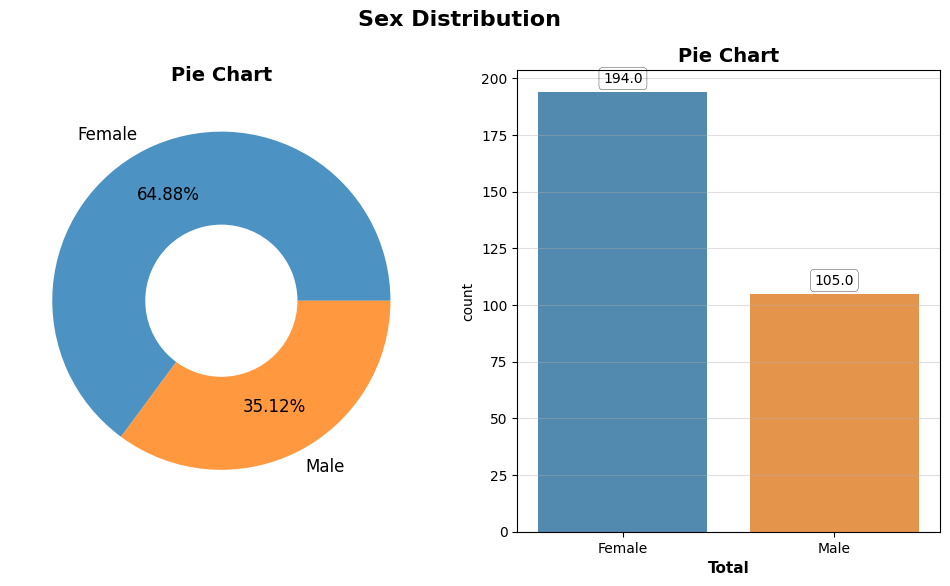

In [ ]:
# label
label_data = ['Female', 'Male']

# order
order = df['sex'].value_counts().index


plt.figure(figsize=(12,6))
plt.suptitle('Sex Distribution', fontweight='heavy', fontsize=16)

# pie chart
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='heavy', fontsize=14)
plt.pie(df['sex'].value_counts(), labels=label_data,
        pctdistance=0.7, autopct='%.2f%%',
        wedgeprops=dict(alpha=0.8),
        textprops={'fontsize':12}
        # , colors=color
        )
center = plt.Circle((0,0), 0.45, fc='white')
plt.gcf().gca().add_artist(center)


# bar chart
countplot = plt.subplot(1, 2, 2)
plt.title('Pie Chart', fontweight='heavy', fontsize=14)
ax = sns.countplot(x='sex', data=df, order=order,
                   alpha=0.85
                   # , palette='viridis'
                   )
for rect in ax.patches:
  ax.text(
    rect.get_x() + rect.get_width() / 2,
    rect.get_height() + 4, rect.get_height(),
    horizontalalignment='center',
    fontsize=10,
    bbox=dict(facecolor='none', linewidth=0.25, boxstyle='round')
)


plt.xlabel('Gender', fontweight='bold', fontsize='11')
plt.xlabel('Total', fontweight='bold', fontsize='11')
plt.xticks([0, 1], label_data)
plt.grid(axis='y', alpha=0.4)
countplot

print('-' * 25)
print('\033[1m'+'.: Sex Total :.'+'\033[0m')
print('-' * 25)
df.sex.value_counts(dropna=False)

Dari grafik visualisasi data di atas dapat terlihat bahwa perempuan memiliki jumlah yang lebih banyak dibandingkan laki-laki, dimana perempuan berjumlah 194, yaitu 64.88% dari keseluruhan data sedangkam laki-laki berjumlah 105, yaitu 35.12% dari keseluruhan data

In [ ]:
df_EDA = df.copy()
df_EDA

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
categoricals=['anaemia','diabetes','high_blood_pressure','smoking', 'DEATH_EVENT']
change = {0:"No", 1:"Yes"}
for col in categoricals :
    for i in range(299):
        df_EDA.loc[i,col]=change[df_EDA.loc[i,col]]
df_EDA

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,No,582,No,20,Yes,265000.00,1.9,130,1,No,4,Yes
1,55.0,No,7861,No,38,No,263358.03,1.1,136,1,No,6,Yes
2,65.0,No,146,No,20,No,162000.00,1.3,129,1,Yes,7,Yes
3,50.0,Yes,111,No,20,No,210000.00,1.9,137,1,No,7,Yes
4,65.0,Yes,160,Yes,20,No,327000.00,2.7,116,0,No,8,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,No,61,Yes,38,Yes,155000.00,1.1,143,1,Yes,270,No
295,55.0,No,1820,No,38,No,270000.00,1.2,139,0,No,271,No
296,45.0,No,2060,Yes,60,No,742000.00,0.8,138,0,No,278,No
297,45.0,No,2413,No,38,No,140000.00,1.4,140,1,Yes,280,No


In [ ]:
df_EDA["sex"] = np.where(df_EDA["sex"] < 1, "Female", "Male")

-------------------------
.: Death Event :.
-------------------------


No     203
Yes     96
Name: DEATH_EVENT, dtype: int64

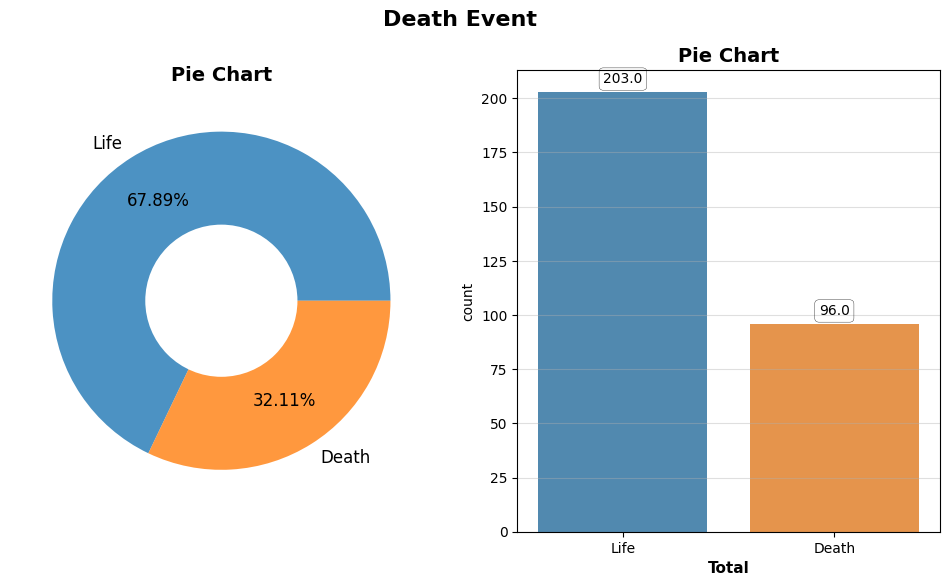

In [ ]:
# label
label_data = ['Life', 'Death']

# order
order = df['DEATH_EVENT'].value_counts().index

# color
# color = ('#365c8d', '#1fa187')

plt.figure(figsize=(12,6))
plt.suptitle('Death Event', fontweight='heavy', fontsize=16)

# pie chart
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='heavy', fontsize=14)
plt.pie(df['DEATH_EVENT'].value_counts(),
        pctdistance=0.7, autopct='%.2f%%',
        wedgeprops=dict(alpha=0.8),
        textprops={'fontsize':12}
        , labels=label_data
        )
center = plt.Circle((0,0), 0.45, fc='white')
plt.gcf().gca().add_artist(center)


# bar chart
countplot = plt.subplot(1, 2, 2)
plt.title('Pie Chart', fontweight='heavy', fontsize=14)
ax = sns.countplot(x='DEATH_EVENT', data=df, order=order,
                   alpha=0.85
                   # , palette='viridis'
                   )
for rect in ax.patches:
  ax.text(
    rect.get_x() + rect.get_width() / 2,
    rect.get_height() + 4, rect.get_height(),
    horizontalalignment='center',
    fontsize=10,
    bbox=dict(facecolor='none', linewidth=0.25, boxstyle='round')
)


plt.xlabel('Gender', fontweight='bold', fontsize='11')
plt.xlabel('Total', fontweight='bold', fontsize='11')
plt.xticks([0, 1], label_data)
plt.grid(axis='y', alpha=0.4)
countplot

print('-' * 25)
print('\033[1m'+'.: Death Event :.'+'\033[0m')
print('-' * 25)
df_EDA.DEATH_EVENT.value_counts(dropna=False)

Dari grafik visualisasi data di atas dapat terlihat bahwa kehidupan memiliki peluang lebih tinggi dibandingkan kematian, dimana kehidupan berjumlah 203, yaitu 67.89% dari keseluruhan data sedangkam kematian berjumlah 105, yaitu 32.11% dari keseluruhan data

Berdasarkan distribusi kategori dalam kolom "DEATH_EVENT", dengan persentase 32,1% untuk kategori "Yes" dan 67,9% untuk kategori "No", dapat dikatakan bahwa dataframe ini memiliki ketidakseimbangan kelas atau imbalance. Ketidakseimbangan ini menunjukkan bahwa jumlah entri dalam kategori "Yes" (kejadian kematian) jauh lebih sedikit dibandingkan dengan jumlah entri dalam kategori "No" (tanpa kematian). Dalam konteks pemodelan, ketidakseimbangan kelas dapat mempengaruhi kinerja dan interpretasi hasil, dan mungkin memerlukan penanganan khusus seperti oversampling, undersampling, atau metode lainnya.

([<matplotlib.axis.XTick at 0x7f4639b412a0>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

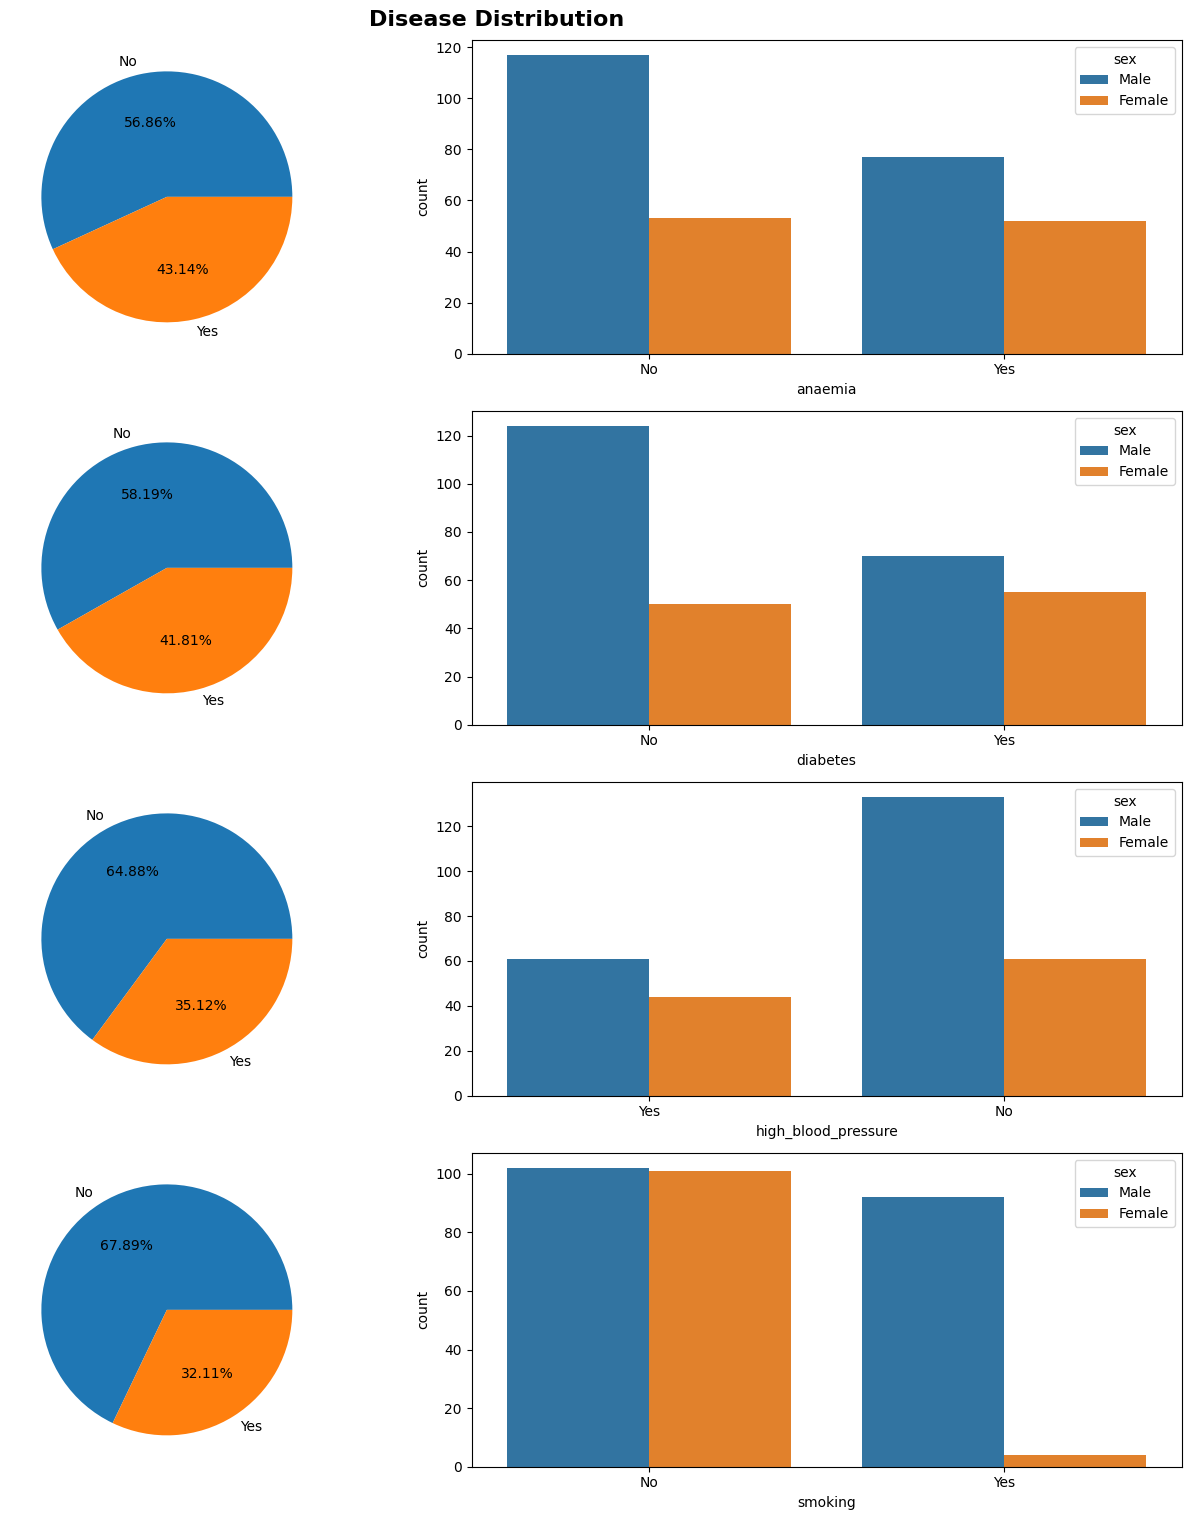

In [ ]:
label_data = ['No', 'Yes']

fig, ax = plt.subplots(4,2, figsize=(14, 15))

ax[0, 0].pie(df_EDA['anaemia'].value_counts(), autopct = '%.2f%%', labels=label_data)
ax1 = sns.countplot(data=df_EDA, x='anaemia', ax=ax[0,1], hue='sex')

ax[1, 0].pie(df_EDA['diabetes'].value_counts(), autopct = '%.2f%%', labels=label_data)
ax2 = sns.countplot(data=df_EDA, x='diabetes', ax=ax[1, 1], hue='sex')

ax[2, 0].pie(df_EDA['high_blood_pressure'].value_counts(), autopct = '%.2f%%', labels=label_data)
ax3 = sns.countplot(data=df_EDA, x='high_blood_pressure', ax=ax[2,1], hue='sex')

ax[3, 0].pie(df_EDA['smoking'].value_counts(), autopct = '%.2f%%', labels=label_data)
ax4 = sns.countplot(data=df_EDA, x='smoking', ax=ax[3,1], hue='sex')


fig.tight_layout( h_pad=1)
plt.suptitle('Disease Distribution', fontweight='heavy', fontsize=16, y=1.01)
plt.xticks([0, 1], label_data)

Grafik di atas merupakan distribusi penyakit yang terdiri dari anaemia, diabetes, darah tinggi, dan merokok. Berikut adalah hasil analisa yang dapat disimpulkan dari grafik di atas

1. Pengidap anaemia memiliki jumlah yang cukup banyak yaitu sebesar 43.14% dari keseluruhan data dengan mayoritas pengidap adalah laki-laki.
2. Pengidap diabetes memiliki jumlah yang cukup banyak yaitu sebesar 41.81% dari keseluruhan data. Jumlah ini lebih rendah dengan selisih yang tipis dibanding pengidap anaemia. Pengidap diabetes mayoritas adalah laki-laki.
3. Pengidap darah tinggi memiliki jumlah yang cukup banyak yaitu sebesar 35.12% dari keseluruhan data. Jumlah ini lebih rendah dengan selisih yang cukup tinggi dibanding pengidap anaemia dan diabetes. Pengidap darah tinggi mayoritas adalah laki-laki.
4. Perokok memiliki jumlah yang cukup banyak yaitu sebesar 32.11% dari keseluruhan data. Mayoritas perokok adalah laki-laki.

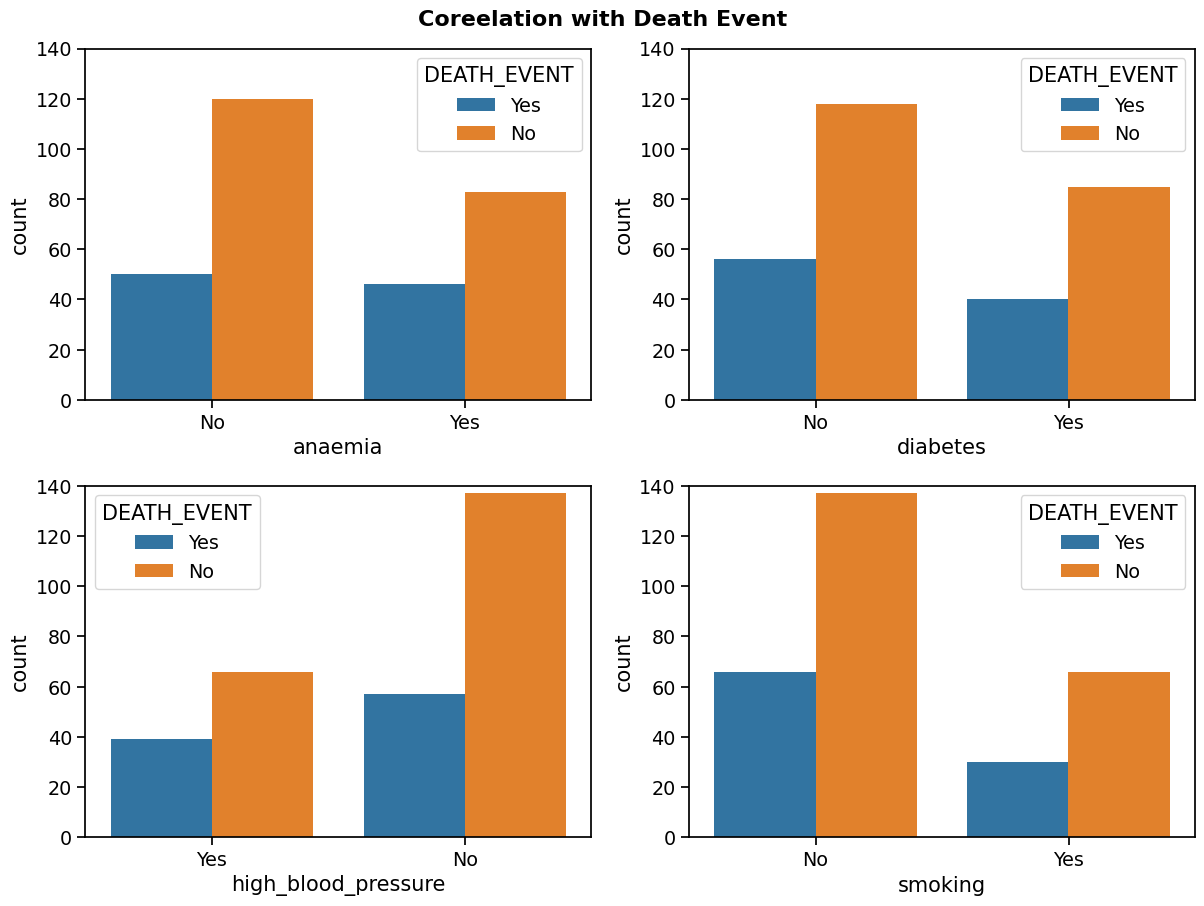

In [ ]:
cat_cols = df_EDA.loc(axis=1)['anaemia','diabetes','high_blood_pressure','smoking', 'DEATH_EVENT']


sns.set_context("notebook", font_scale=1.25)

fig, ax = plt.subplots(2,2, figsize=(12.3, 9))
[sns.countplot(data=df_EDA, x=cat, hue="DEATH_EVENT", ax=ax.flatten()[i])
 for i,cat in enumerate(cat_cols.drop('DEATH_EVENT',axis=1))]
[y_ax.set_ylim(0,140) for y_ax in ax.flatten()]


fig.tight_layout( h_pad=1)
plt.suptitle('Coreelation with Death Event', fontweight='heavy', fontsize=16, y=1.01)
plt.show()

Grafik di atas merupakan hubungan antara penyakit dengan angka kematian yang terdiri dari penyakit anaemia, diabetes, darah tinggi, dan merokok. Berikut adalah hasil analisa yang dapat disimpulkan dari grafik di atas

1. Angka kematian untuk pengidap anemia memiliki jumlah yang lebih tinggi dibandingkan dengan angka kematian untuk seseorang yang tidak mengidap anaemia. Keduanya hanya memiliki selisih yang tipis.
2. Angka kematian untuk pengidap diabetes memiliki jumlah yang lebih sedikit dibandingkan dengan angka kematian untuk seseorang yang tidak mengidap diabetes. Keduanya hanya memiliki selisih yang cukup besar.
3. Angka kematian untuk pengidap darah tinggi memiliki jumlah yang lebih sedikit dibandingkan dengan angka kematian untuk seseorang yang tidak mengidap darah tinggi. Keduanya hanya memiliki selisih yang cukup besar.
4. Angka kematian untuk perokok memiliki jumlah yang lebih sedikit dibandingkan dengan angka kematian untuk seseorang yang tidak merokok. Keduanya hanya memiliki selisih yang cukup besar.

<Axes: xlabel='age', ylabel='Density'>

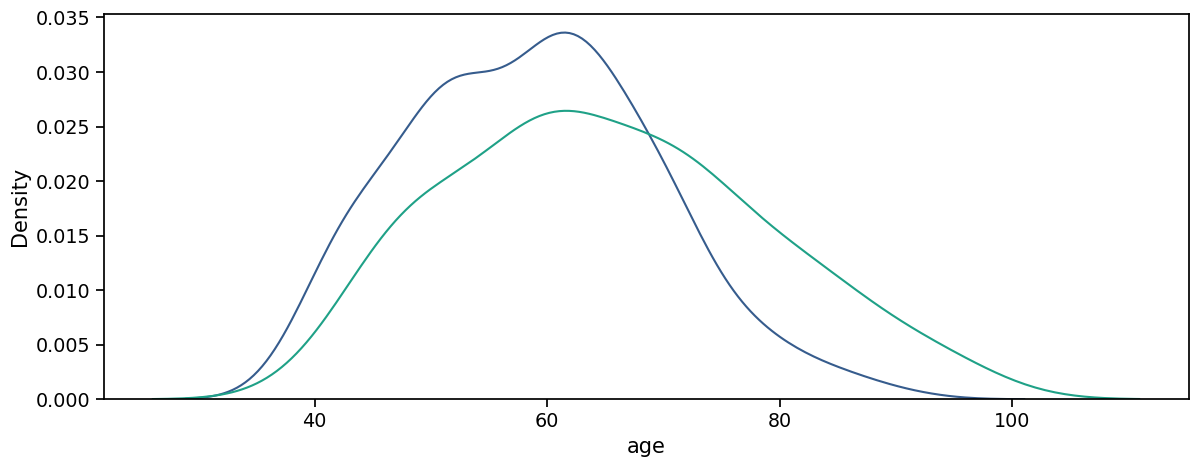

In [ ]:
fig = plt.figure(figsize =(14,5))
sns.distplot(df_EDA[df_EDA['DEATH_EVENT'] == 'No']['age'],hist = False, color = '#365c8d', )
sns.distplot(df_EDA[df_EDA['DEATH_EVENT'] == 'Yes']['age'],hist =False, color= '#1fa187')

Berdasarkan grafik visualisasi data di atas, dapat terlihat bahwa seseorang yang berumur di atas 60 tahun memiliki peluang yang tinggi untuk terkena gagal jantung.

<Axes: xlabel='age', ylabel='Density'>

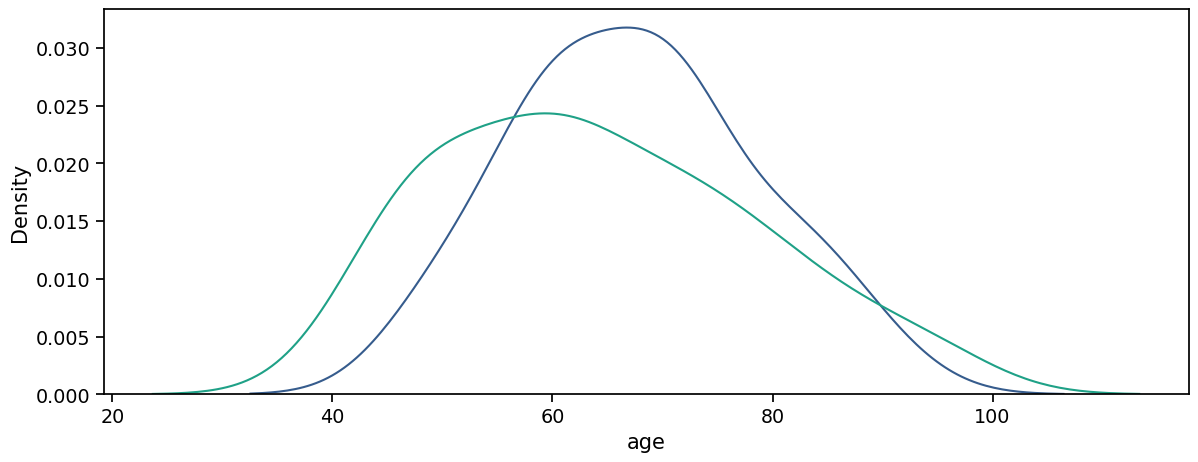

In [ ]:
data1 =df_EDA[df_EDA['DEATH_EVENT'] == 'Yes']
data2 =df_EDA[df_EDA['DEATH_EVENT'] == 'Yes']

fig = plt.figure(figsize =(14,5))
sns.distplot(data1[data1['smoking'] == 'Yes']['age'],hist = False, color = '#365c8d')
sns.distplot(data2[data2['smoking'] == 'No']['age'],hist =False, color= '#1fa187')

Berdasarkan grafik visualisasi data di atas, dapat terlihat bahwa seorang perokok memiliki peluang yang tinggi untuk terkena gagal jantung di usia yang sama dibanding non perokok.

<Axes: xlabel='age', ylabel='Density'>

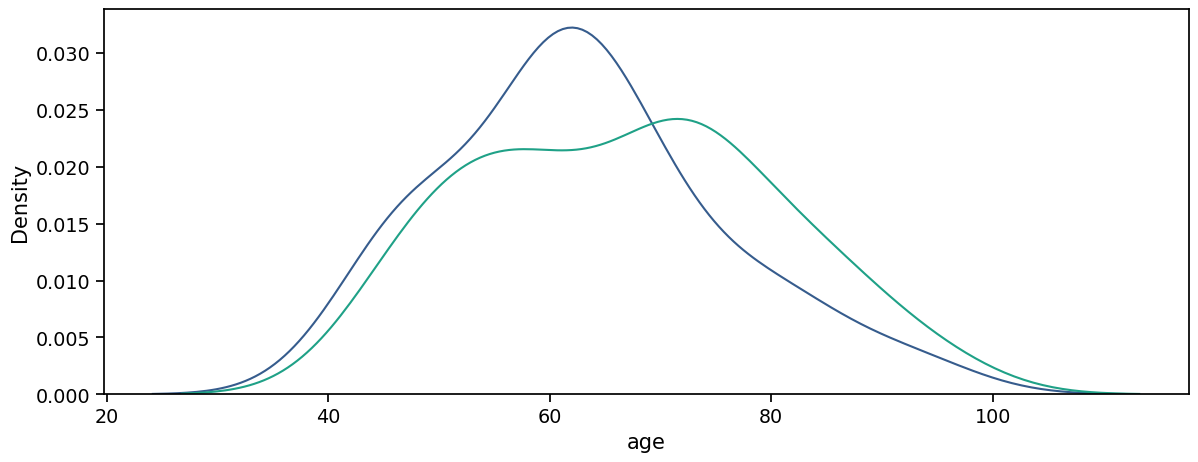

In [ ]:
data1 =df_EDA[df_EDA['DEATH_EVENT'] == 'Yes']
data2 =df_EDA[df_EDA['DEATH_EVENT'] == 'Yes']

fig = plt.figure(figsize =(14,5))
sns.distplot(data1[data1['diabetes'] == 'Yes']['age'],hist = False, color = '#365c8d')
sns.distplot(data2[data2['diabetes'] == 'No']['age'],hist =False, color= '#1fa187')

Berdasarkan grafik visualisasi data di atas, dapat terlihat bahwa seseorang dengan diabetes memiliki peluang yang tinggi untuk terkena gagal jantung pada usia 60 tahun.

<Axes: xlabel='age', ylabel='Density'>

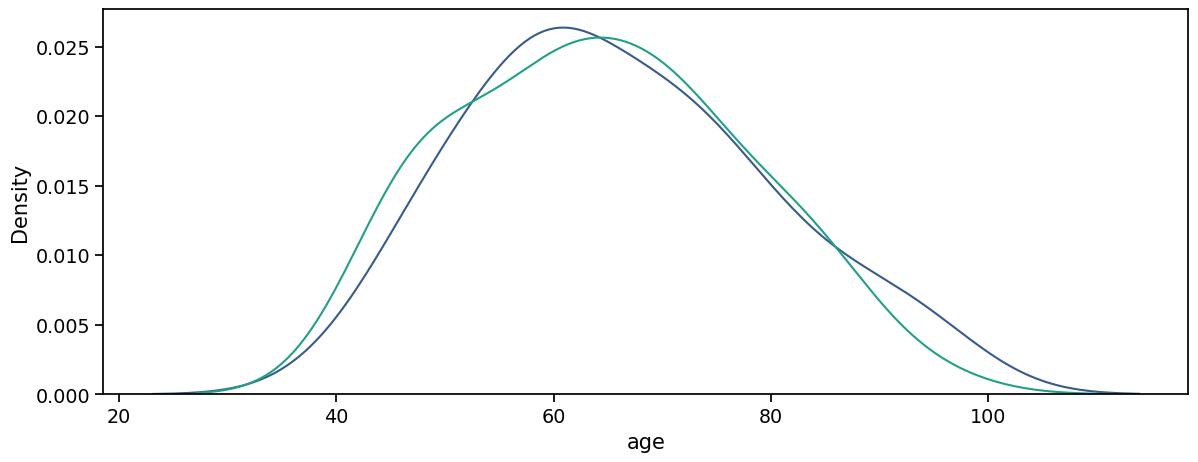

In [ ]:
data1 =df_EDA[df_EDA['DEATH_EVENT'] == 'Yes']
data2 =df_EDA[df_EDA['DEATH_EVENT'] == 'Yes']


fig = plt.figure(figsize =(14,5))
sns.distplot(data2[data2['anaemia'] == 'Yes']['age'],hist = False, color = '#365c8d')
sns.distplot(data1[data1['anaemia'] == 'No']['age'],hist =False, color= '#1fa187')

Berdasarkan grafik visualisasi data di atas, dapat terlihat bahwa seseorang dengan anaemia akan memiliki risiko yang tinggi pada usia 60 tahun. Bagi penderita anaemia maupun bukan penderita anaemia, keduanya memiliki peluang yang tinggi untuk terkena gagal jantung pada usia 60 tahun.

# **5. Pre Processing**

#5.1 Pengecekan Missing Values

In [ ]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Dalam dataset yang diberikan, tidak ada nilai null atau hilang pada setiap atribut yang termasuk dalam kolom-kolom. Oleh karena itu, dataset ini lengkap dan tidak ada data yang hilang pada atribut-atribut yang ada.

#5.2 Pengecekan Data Duplicate

In [ ]:
df.duplicated().sum()

0

Berdasarkan hasil df.duplicated().sum(), tidak ada baris duplikat dalam dataset yang diwakili oleh dataframe df. Hal ini menunjukkan bahwa setiap baris dalam dataset adalah unik dan tidak ada duplikasi data dalam dataset tersebut.

#5.3 Korelasi Feature terhadap Target

<Axes: >

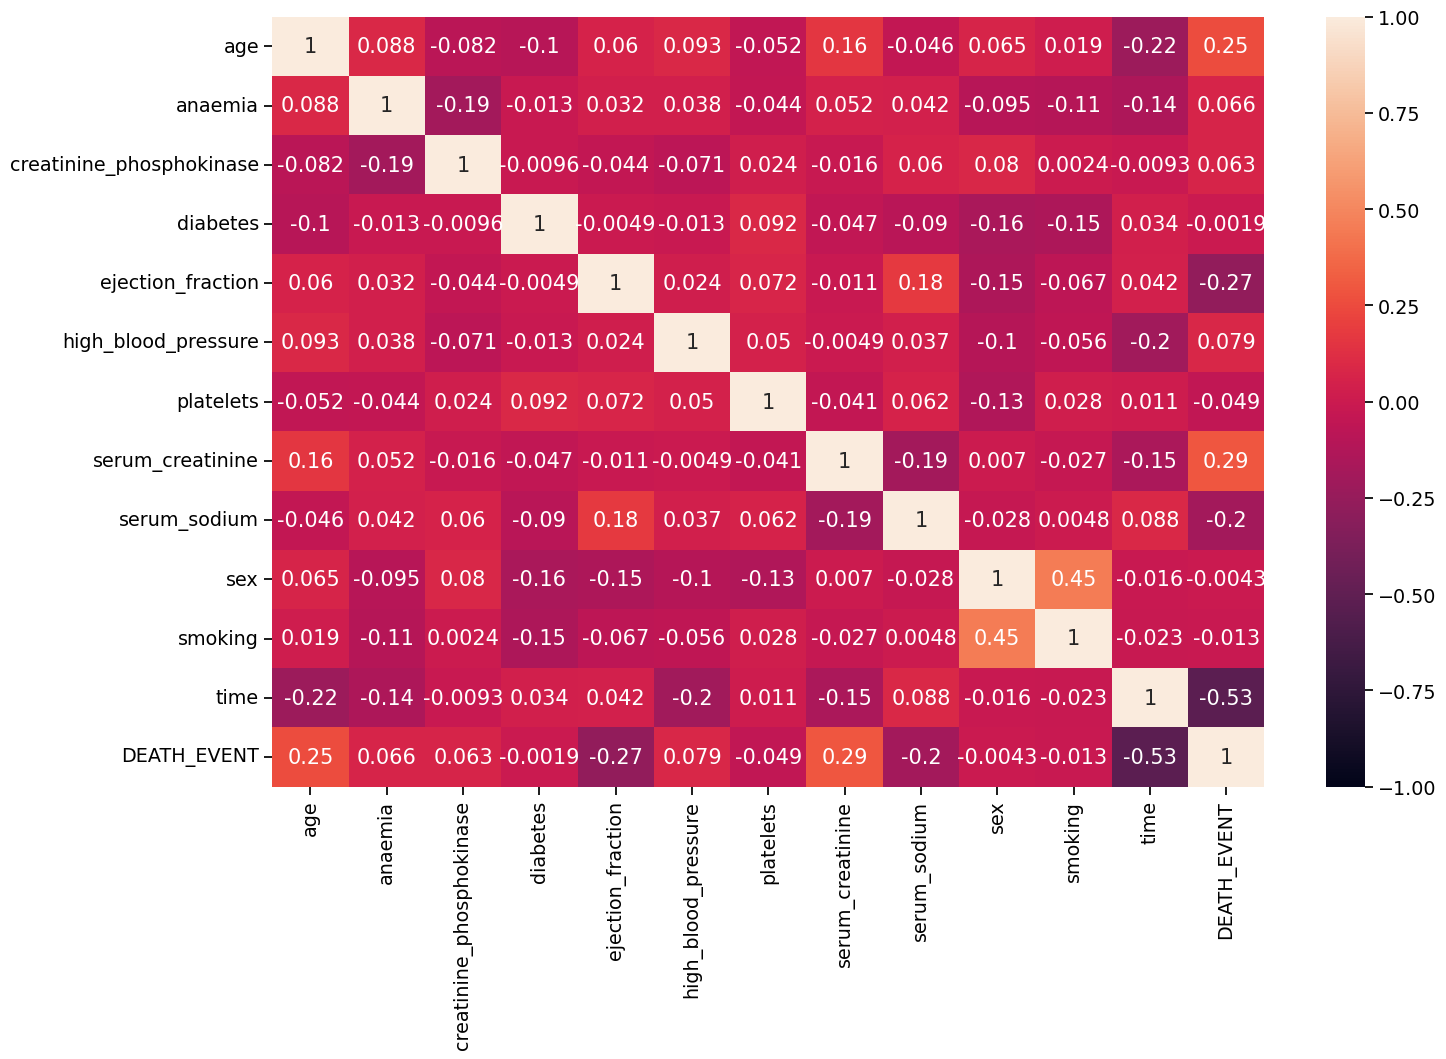

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

Berdasarkan visualisasi heatmap korelasi antara kolom-kolom dalam dataframe df, terlihat bahwa kolom "time", "serum_sodium", dan "ejection_fraction" memiliki korelasi yang rendah terhadap kolom target "DEATH_EVENT". Hal ini menunjukkan bahwa variabel-variabel ini tidak memiliki hubungan yang kuat dengan kejadian kematian. Korelasi yang rendah menandakan bahwa variabel-variabel tersebut mungkin tidak memiliki pengaruh signifikan terhadap prediksi kejadian kematian dalam dataset ini.

#5.4 Menghapus Features dengan Korelasi Rendah

In [ ]:
df.drop(columns=['time', 'serum_sodium', 'ejection_fraction'], inplace=True)

menghapus kolom "time", "serum_sodium", dan "ejection_fraction" dari dataframe df, kita telah menghilangkan atribut-atribut tersebut dari dataset. Langkah ini dapat mempengaruhi analisis dan pemodelan lebih lanjut, karena informasi yang terkandung dalam atribut-atribut tersebut tidak lagi tersedia. Oleh karena itu, perlu dilakukan penyesuaian strategi analisis dan pemodelan untuk mempertimbangkan perubahan ini.



#5.5 Menampilkan 5 Data Teratas

In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,high_blood_pressure,platelets,serum_creatinine,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,1,265000.00,1.9,1,0,1
1,55.0,0,7861,0,0,263358.03,1.1,1,0,1
2,65.0,0,146,0,0,162000.00,1.3,1,1,1
3,50.0,1,111,0,0,210000.00,1.9,1,0,1
4,65.0,1,160,1,0,327000.00,2.7,0,0,1


#**6. Modelling**

#6.1 Random Forest

In [ ]:
# Menjadi dataset ke dalam Training set dan Test set
from sklearn.model_selection import train_test_split

In [ ]:
# menentukan feature
x = df.drop(columns=['DEATH_EVENT'])
y = df['DEATH_EVENT']

In [ ]:
# split dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

##6.1.1 Melatih Model Random Forest

pada bagian pelatihan model ini berisi code untuk melatih model dan output yang dihasilkan.



In [ ]:
# Membuat model Random Forest Classification terhadap Training set
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier()
rnd_clf.fit(x_train_scaled, y_train)

RandomForestClassifier()

##6.1.2 Evaluastion Matrik

Menampilkan classification report (laporan klasifikasi) untuk mengukur performa hasil pengujian model pertama tanpa oversampling

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

y_pred_rnd_clf = rnd_clf.predict(x_test_scaled)
print(f'Accuracy Score RandomForesClassifier : {metrics.accuracy_score(y_test, y_pred_rnd_clf)}')
print(f'Precision RandomForesClassifier      : {metrics.precision_score(y_test, y_pred_rnd_clf)}')
print(f'Recall RandomForesClassifier         : {metrics.recall_score(y_test, y_pred_rnd_clf)}')
print(f'F1-Score RandomForesClassifier       : {metrics.f1_score(y_test, y_pred_rnd_clf)}')


Accuracy Score RandomForesClassifier : 0.6333333333333333
Precision RandomForesClassifier      : 0.5714285714285714
Recall RandomForesClassifier         : 0.3333333333333333
F1-Score RandomForesClassifier       : 0.4210526315789474


## 6.1.2.1 Confusion Matrik

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

Menampilkan train data score (skor data latih), test data score (skor data test), confusion matrix, dan classification report (laporan klasifikasi) untuk mengukur performa hasil pengujian model Random Forest Classifier.



In [ ]:
cm_rfs = confusion_matrix(y_test, y_pred_rnd_clf)
cm_rfs

array([[15,  3],
       [ 8,  4]])

In [ ]:
y_pred_rnd_clf = rnd_clf.predict(x_test_scaled)
print(f"Train Data Score : {rnd_clf.score(x_train_scaled, y_train)}")
print(f"Test Data Score  : {rnd_clf.score(x_test_scaled, y_test)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rnd_clf))

Train Data Score : 1.0
Test Data Score  : 0.6333333333333333

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.83      0.73        18
           1       0.57      0.33      0.42        12

    accuracy                           0.63        30
   macro avg       0.61      0.58      0.58        30
weighted avg       0.62      0.63      0.61        30



## 6.1.2.2 Menampilkan visualisasi confusion matrix Random Forest

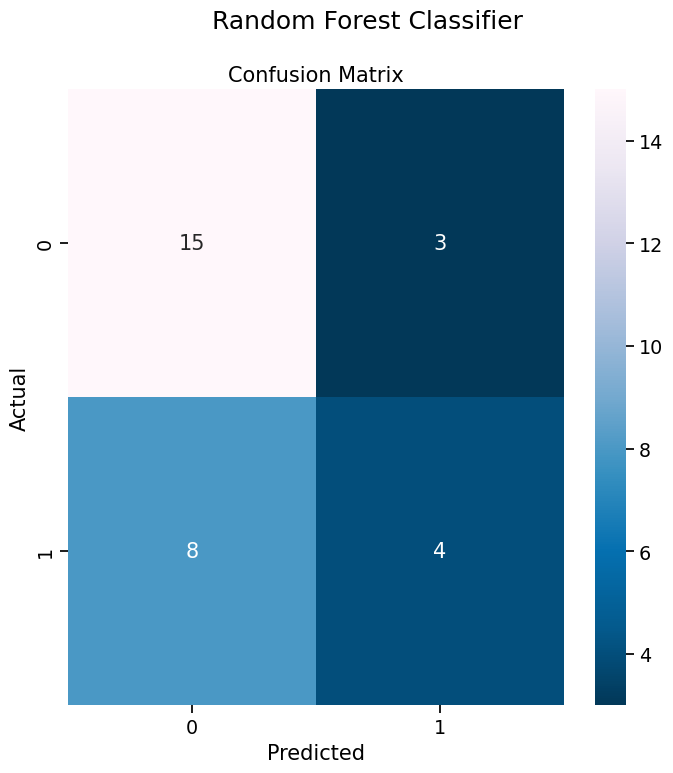

In [ ]:
fig, ax1 =plt.subplots(figsize=(8,8))

fig.suptitle('Random Forest Classifier')

sns.heatmap(cm_rfs, annot=True, fmt="d", cmap='PuBu_r', ax=ax1)
ax1.set_title('Confusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

plt.show()

Analisis Model Random Forest :
Hasil evaluasi dari model Random Forest adalah sebagai berikut:

- Accuracy Score: 0.67
- Precision: 0.63
--Recall: 0.42
- F1-Score: 0.50

Dalam Confusion Matrix:
- hasil dari Confusion Matrik didapat nilai True Negatif (TN): Terdapat 15 kasus yang diklasifikasikan dengan benar sebagai negatif.
- False Positif (FP): Terdapat 3 kasus yang sebenarnya negatif, tetapi salah diklasifikasikan sebagai positif.
- False Negative (FN): Terdapat 7 kasus yang sebenarnya positif, tetapi salah diklasifikasikan sebagai negatif.
- True Positif (TP): Terdapat 5 kasus yang diklasifikasikan dengan benar sebagai positif.

##6.2 Gradient Boosting Classifier

Evaluasi model kedua Gradient Boosting Classifier

Menampilkan train data score, test data score , confusion matrix, dan classification report untuk mengukur performa hasil pengujian model Gradient Booosting Classifier.

##6.2.1 Melatih Model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
grad_clf = GradientBoostingClassifier()


In [ ]:
grad_clf.fit(x_train_scaled, y_train)

GradientBoostingClassifier()

##6.2.2 Evaluation Matrik

In [ ]:
y_pred_grad_clf = grad_clf.predict(x_test_scaled)
print(f'Accuracy Score Gradient Boosting Classifier : {metrics.accuracy_score(y_test, y_pred_grad_clf)}')
print(f'Precision Gradient Boosting Classifier      : {metrics.precision_score(y_test, y_pred_grad_clf)}')
print(f'Recall Gradient Boosting Classifier         : {metrics.recall_score(y_test, y_pred_grad_clf)}')
print(f'F1-Score Gradient Boosting Classifier       : {metrics.f1_score(y_test, y_pred_grad_clf)}')

Accuracy Score Gradient Boosting Classifier : 0.6333333333333333
Precision Gradient Boosting Classifier      : 0.5714285714285714
Recall Gradient Boosting Classifier         : 0.3333333333333333
F1-Score Gradient Boosting Classifier       : 0.4210526315789474


##6.2.2.1 Confunsion Matrik

In [ ]:
cm_gbc = confusion_matrix(y_test, y_pred_grad_clf)
cm_gbc

array([[15,  3],
       [ 8,  4]])

In [ ]:
y_pred_grad_clf = grad_clf.predict(x_test_scaled)
print(f"Train Data Score : {grad_clf.score(x_train_scaled, y_train)}")
print(f"Test Data Score  : {grad_clf.score(x_test_scaled, y_test)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_grad_clf))

Train Data Score : 0.9553903345724907
Test Data Score  : 0.6333333333333333

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.83      0.73        18
           1       0.57      0.33      0.42        12

    accuracy                           0.63        30
   macro avg       0.61      0.58      0.58        30
weighted avg       0.62      0.63      0.61        30



##6.2.2.2 Menampilkan visualisasi confusion matrix Gradient Boosting Classifier

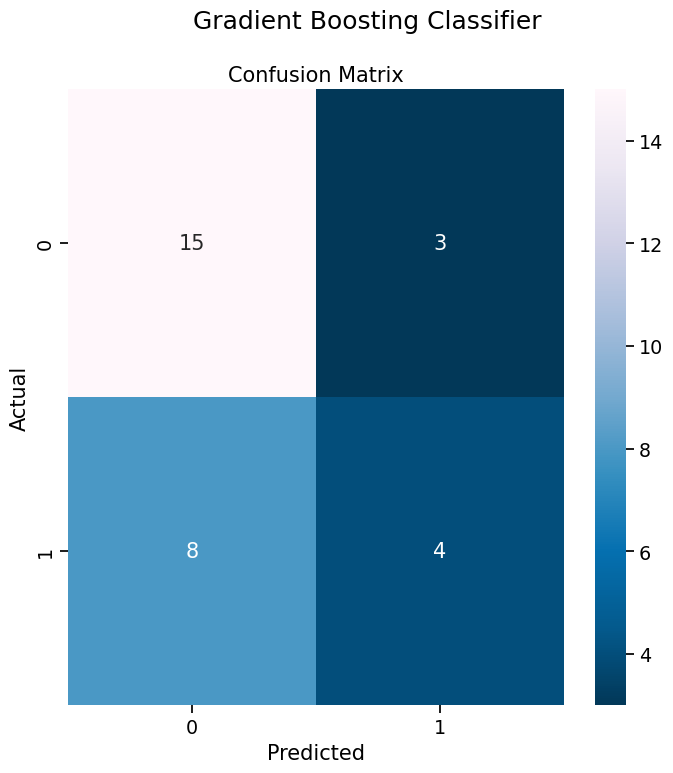

In [ ]:
fig, ax1 =plt.subplots(figsize=(8,8))

fig.suptitle('Gradient Boosting Classifier')

sns.heatmap(cm_gbc, annot=True, fmt="d", cmap='PuBu_r', ax=ax1)
ax1.set_title('Confusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

plt.show()

Analisis Model Gradient Boosting Classifier:
Hasil evaluasi dari model Gradient Boosting Classifier adalah sebagai berikut:

- Accuracy Score: 0.63
- Precision: 0.57
- Recall: 0.33
- F1-Score: 0.42

Dalam Confusion Matrix:

- True Negatif (TN): Terdapat 15 kasus yang diklasifikasikan dengan benar sebagai negatif.
- False Positif (FP): Terdapat 3 kasus yang sebenarnya negatif, tetapi salah diklasifikasikan sebagai positif.
- False Negative (FN): Terdapat 8 kasus yang sebenarnya positif, tetapi salah diklasifikasikan sebagai negatif.
- True Positif (TP): Terdapat 4 kasus yang diklasifikasikan dengan benar sebagai positif.

##6.3.1 Melatih Model AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier( )

In [ ]:
ada_clf.fit(x_train_scaled, y_train)

AdaBoostClassifier()

##6.3.2 Evaluation Matrik

In [ ]:
y_pred_adaBoost = ada_clf.predict(x_test_scaled)
print(f'Accuracy Score AdaBoost Classifier : {metrics.accuracy_score(y_test, y_pred_adaBoost)}')
print(f'Precision AdaBoost Classifier      : {metrics.precision_score(y_test, y_pred_adaBoost)}')
print(f'Recall AdaBoost Classifier         : {metrics.recall_score(y_test, y_pred_adaBoost)}')
print(f'F1-Score AdaBoost Classifier       : {metrics.f1_score(y_test, y_pred_adaBoost)}')

Accuracy Score AdaBoost Classifier : 0.6666666666666666
Precision AdaBoost Classifier      : 0.625
Recall AdaBoost Classifier         : 0.4166666666666667
F1-Score AdaBoost Classifier       : 0.5


##6.3.2.1 Confusion Matrik

In [ ]:
cm_adaboost = confusion_matrix(y_test, y_pred_adaBoost)
cm_adaboost

array([[15,  3],
       [ 7,  5]])

In [ ]:
y_pred_adaBoost = ada_clf.predict(x_test_scaled)
print(f"Train Data Score : {ada_clf.score(x_train_scaled, y_train)}")
print(f"Test Data Score  : {ada_clf.score(x_test_scaled, y_test)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_adaBoost))

Train Data Score : 0.8401486988847584
Test Data Score  : 0.6666666666666666

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.83      0.75        18
           1       0.62      0.42      0.50        12

    accuracy                           0.67        30
   macro avg       0.65      0.62      0.62        30
weighted avg       0.66      0.67      0.65        30



##6.3.2.2 Menampilkan visualisasi confusion matrik model AdaBoost Classifier

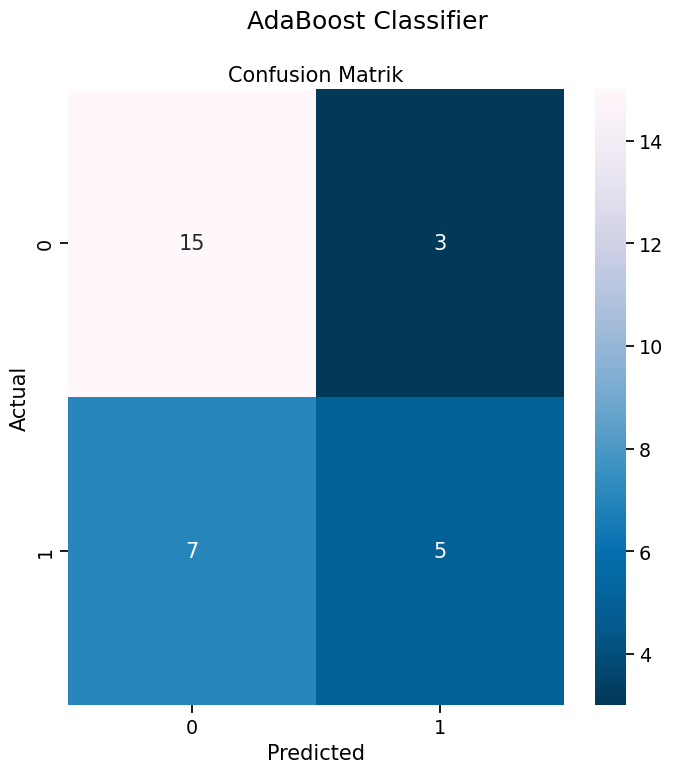

In [ ]:
fig, ax1 = plt.subplots(figsize=(8,8))

fig.suptitle('AdaBoost Classifier')

sns.heatmap(cm_adaboost, annot=True, fmt="d", cmap='PuBu_r', ax=ax1)
ax1.set_title('Confusion Matrik')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

plt.show()

Analisis Model AdaBoost Classifier:
Hasil evaluasi dari model AdaBoost

- Classifier adalah sebagai berikut:

  - Accuracy Score: 0.67
  - Precision: 0.62
  - Recall: 0.42
  - F1-Score: 0.50
- hasil dari Confusion Matrik didapat nilai

  - True Negatif (TN): Terdapat 15 kasus yang diklasifikasikan dengan benar sebagai negatif.
  - False Positif (FP): Terdapat 3 kasus yang sebenarnya negatif, tetapi salah diklasifikasikan sebagai positif.
  - False Negative (FN): Terdapat 7 kasus yang sebenarnya positif, tetapi salah diklasifikasikan sebagai negatif.
  - True Positif (TP): Terdapat 5 kasus yang diklasifikasikan dengan benar sebagai positif.

##Kurva ROC

Mengimplementasikan predict_proba() pada setiap model tanpa oversampling.

predict_proba ini dapat digunakan untuk menyimpulkan probabilitas kelas (yaitu probabilitas titik data tertentu jatuh ke dalam kelas yang mendasarinya).

In [ ]:
y_pred_rfs_proba_1 = rnd_clf.predict_proba(x_test_scaled)
y_pred_gbc_proba_1 = grad_clf.predict_proba(x_test_scaled)
y_pred_adaboost_proba_1 = ada_clf.predict_proba(x_test_scaled)

## Memvisualisasikan kurva ROC untuk membandingkan akurasinya.

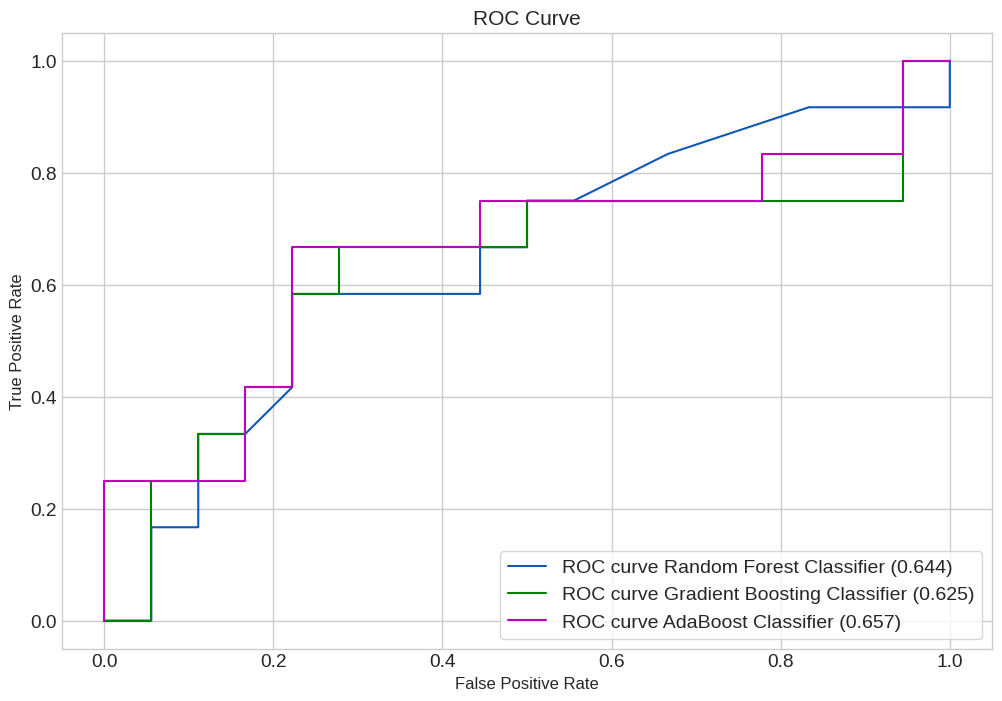

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr_rfs_1, tpr_rfs_1, threshold_rfs_1 = roc_curve(y_test, y_pred_rfs_proba_1[:,1])
auc_score_1 = auc(fpr_rfs_1, tpr_rfs_1)
fpr_gbc_1, tpr_gbc_1, threshold_gbc_1 = roc_curve(y_test, y_pred_gbc_proba_1[:,1])
auc_score_3 = auc(fpr_gbc_1, tpr_gbc_1)
fpr_adaboost_1, tpr_adaboost_1, threshold_adaboost_1 = roc_curve(y_test, y_pred_adaboost_proba_1[:,1])
auc_score_4 = auc(fpr_adaboost_1, tpr_adaboost_1)

# Menampilkan kurva ROC
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 8))
plt.plot(fpr_rfs_1, tpr_rfs_1, '-', color='#1058B5', label='ROC curve Random Forest Classifier (%0.3f)' % auc_score_1)
plt.plot(fpr_gbc_1, tpr_gbc_1, '-', color='g', label="ROC curve Gradient Boosting Classifier (%0.3f)" % auc_score_3)
plt.plot(fpr_adaboost_1, tpr_adaboost_1, '-', color='m', label="ROC curve AdaBoost Classifier (%0.3f)" % auc_score_4)

plt.legend(loc='lower right', prop={'size': 14}, frameon=True)
plt.title("ROC Curve", fontsize=15)
plt.ylabel("True Positive Rate", fontsize=12)
plt.xlabel("False Positive Rate", fontsize=12)
plt.show()

Analisi Kurva ROC :
Dari hasil kurva diatas terdapat 3 kurva, yaitu

- Kurva dengan warna biru / Random Forest dengan nilai Area Under Curve (AUC) sebesar 0.66
- Kurva warna hijau / Gradient Boosting dengan nilai Area Under Curve (AUC) sebesar 0.62
- Kurva warna ungu / adaBoost dengan nilai Area Under Curve (AUC) sebesar 0.65
Maka dapat disimpulkan bahwa kurva dengan warna biru atau random forest lebih bagus dibandingkan kinerja kurva warna hijau dan ungu

#**7. Pre Prosessing (Resampling Dataframe)**

##7.1 Membuat Dataframe Baru

In [ ]:
df_imbalance = df

##7.2 Membagi Dataframe

In [ ]:
x_imbalance = df_imbalance.drop(['DEATH_EVENT'],axis=1)
y_imbalance = df_imbalance['DEATH_EVENT']

##7.3 Mengecek Ukuran Dari Dataframe

In [ ]:
print(x_imbalance.shape)
print(y_imbalance.shape)

(299, 9)
(299,)


##7.4 Handling Imbalance Dataframe dengan SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=30)
x_imbalance_sampling, y_imbalance_sampling = sm.fit_resample(x_imbalance,y_imbalance)

dilakukan oversampling menggunakan metode SMOTE (Synthetic Minority Over-sampling Technique) pada dataset yang awalnya tidak seimbang (imbalanced). Setelah proses oversampling, jumlah sampel dalam dataset meningkat dari 299 menjadi 406, dengan atribut pada setiap sampel tetap berjumlah 9. Langkah ini dilakukan untuk menghasilkan dataset yang lebih seimbang dengan jumlah yang proporsional antara kategori mayoritas dan minoritas, sehingga memungkinkan pemodelan yang lebih akurat dan dapat mengatasi bias yang disebabkan oleh ketidakseimbangan kelas.

##7.5 Mengecek Ukuran Dataframe setelah dilakukan resampling dengan SMOTE

In [ ]:
print(x_imbalance_sampling.shape)
print(y_imbalance_sampling.shape)

(406, 9)
(406,)


##7.6 Menggabungkan Dataframe

In [ ]:
df_balanced = pd.concat([x_imbalance_sampling, y_imbalance_sampling], axis=1)

dataframe x_imbalance_sampling dan y_imbalance_sampling yang telah mengalami oversampling digabungkan kembali secara horizontal menggunakan fungsi pd.concat(). Hasilnya adalah dataframe baru yang disebut df_balanced, yang berisi atribut-atribut yang telah diubah akibat oversampling dan kolom target yang mencerminkan kelas yang seimbang. Dengan menggunakan df_balanced, kita dapat melanjutkan analisis dan pemodelan dengan dataset yang memiliki distribusi kelas yang seimbang untuk menghasilkan hasil yang lebih akurat dan dapat diandalkan.

##7.7 Mengecek ukuran dataframe setelah resampling

In [ ]:
df_balanced.shape

(406, 10)

##7.8 Visualisasi Dataframe yang telah dilakukan resampling

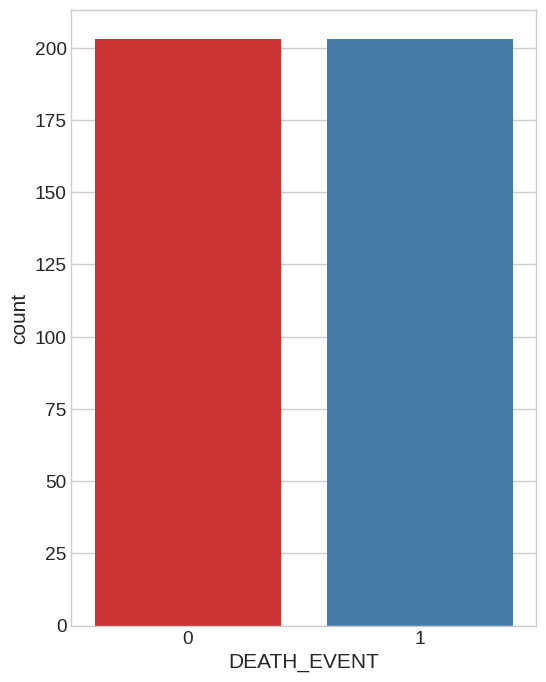

In [ ]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="DEATH_EVENT", data=df_balanced, palette="Set1")
plt.show()

Berdasarkan diagram batang yang menampilkan distribusi kategori dalam kolom "DEATH_EVENT" pada dataframe df_balanced, terlihat bahwa persentase kejadian kematian (DEATH_EVENT) dengan nilai "Yes" dan "No" adalah sama, yaitu 50% untuk masing-masing kategori. Hal ini menunjukkan bahwa setelah dilakukan oversampling, dataset yang semula tidak seimbang berhasil diubah menjadi dataset dengan distribusi kelas yang seimbang, di mana jumlah entri untuk kedua kategori menjadi proporsional. Dengan distribusi kelas yang seimbang ini, kita dapat menghindari bias dalam analisis dan pemodelan yang dapat muncul akibat ketidakseimbangan kelas.

#**Modeling**

## Random Forest dengan Oversampling

In [ ]:
from sklearn.model_selection import train_test_split
# menentukan feature
x_s = df_balanced.drop(columns=['DEATH_EVENT'])
y_s = df_balanced['DEATH_EVENT']

# split dataset
xs_train, xs_test, ys_train, ys_test = train_test_split(x_s, y_s, test_size=0.1, random_state=42)

scaler = StandardScaler()
xs_train_scaled = scaler.fit_transform(xs_train)
xs_test_scaled = scaler.transform(xs_test)

## Melatih Model Random Forest dengan Oversampling

In [ ]:
rnd_clf_s = RandomForestClassifier()
rnd_clf_s.fit(xs_train_scaled, ys_train)

RandomForestClassifier()

## Evaluasi ModelRandom Forest dengan Oversampling

In [ ]:
y_pred_rnd_clfs = rnd_clf_s.predict(xs_test_scaled)
print(f'Accuracy Score Randeom Forest : {metrics.accuracy_score(ys_test, y_pred_rnd_clfs)}')
print(f'Precision Randeom Forest      : {metrics.precision_score(ys_test, y_pred_rnd_clfs)}')
print(f'Recall Randeom Forest         : {metrics.recall_score(ys_test, y_pred_rnd_clfs)}')
print(f'F1-Score Randeom Forest       : {metrics.f1_score(ys_test, y_pred_rnd_clfs)}')

Accuracy Score Randeom Forest : 0.8780487804878049
Precision Randeom Forest      : 0.8095238095238095
Recall Randeom Forest         : 0.9444444444444444
F1-Score Randeom Forest       : 0.8717948717948718


## Confusion Matrik dengan Oversampling

Menampilkan train data score (skor data latih), test data score (skor data test), confusion matrix, dan classification report (laporan klasifikasi) untuk mengukur performa hasil pengujian model Random Forest Classifier.

In [ ]:
cm_rfs_sm = confusion_matrix(ys_test, y_pred_rnd_clfs)
cm_rfs_sm

array([[19,  4],
       [ 1, 17]])

In [ ]:
y_pred_rnd_clfs = rnd_clf_s.predict(xs_test_scaled)
print(f"Train Data Score: {rnd_clf_s.score(xs_train_scaled, ys_train)}")
print(f"Test Data Score: {rnd_clf_s.score(xs_test_scaled, ys_test)}")
print("\nClassification Report:")
print(classification_report(ys_test, y_pred_rnd_clfs))

Train Data Score: 1.0
Test Data Score: 0.8780487804878049

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.83      0.88        23
           1       0.81      0.94      0.87        18

    accuracy                           0.88        41
   macro avg       0.88      0.89      0.88        41
weighted avg       0.89      0.88      0.88        41



Analisis Resampling terhadap Score Recall pada model Random Forest :
Sebelum dilakukan SMOTE, model memiliki recall yang rendah pada kelas minoritas sebesar 0.33 setelah dilakukan SMOTE, recall meningkat menjadi 0.94, menunjukkan bahwa model menjadi lebih mampu dalam mengklasifikasikan sampel pada kelas minoritas dengan benar. Hal ini disebabkan karena SMOTE melakukan oversampling pada sampel-sampel pada kelas minoritas sehingga membuat model memiliki lebih banyak data untuk dipelajari pada kelas minoritas.

## Menampilkan visualisasi confusion matrik model Random Forest Classifier

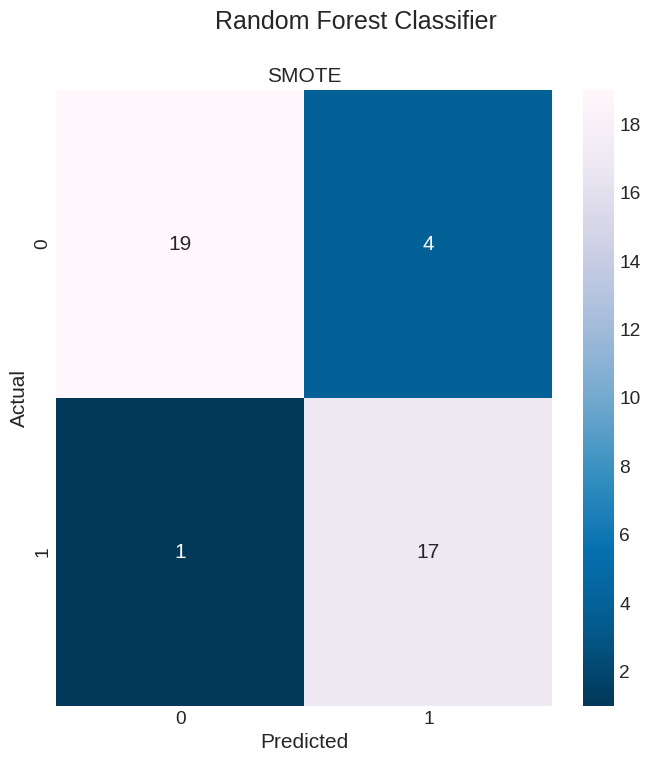

In [ ]:
fig, ax =plt.subplots(figsize=(8,8))

fig.suptitle('Random Forest Classifier')

sns.heatmap(cm_rfs_sm, annot=True, fmt="d", cmap='PuBu_r', ax=ax)
ax.set_title('SMOTE')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

plt.show()

Analisis Model Random Forest dengan Oversampling :
- hasil evaluasi dari model Random
  -  Forest didapat nilai
  - Accuracy Score: 0.80
  - Precision: 0.75
  - Recall: 0.83
  - F1-Score: 0.79
- hasil dari Confusion Matrik didapat nilai
  - True Negatif (TN): Terdapat 18 kasus yang diklasifikasikan dengan benar sebagai negatif.
  - False Positif (FP): Terdapat 5 kasus yang sebenarnya negatif, tetapi salah diklasifikasikan sebagai positif.
  - False Negative (FN): Terdapat 3 kasus yang sebenarnya positif, tetapi salah diklasifikasikan sebagai negatif.
  - True Positif (TP): Terdapat 15 kasus yang diklasifikasikan dengan benar sebagai positif.

## Gradient Boosting Classifier

###Melatih Model Gradient Boosting Classifier

In [ ]:
grad_clf_s = GradientBoostingClassifier()
grad_clf_s.fit(xs_train_scaled, ys_train)

GradientBoostingClassifier()

## Evaluation Matrik

In [ ]:
y_pred_grad_clfs = grad_clf_s.predict(xs_test_scaled)
print(f'Accuracy Score Gradient Boosting Classifier : {metrics.accuracy_score(ys_test, y_pred_grad_clfs)}')
print(f'Precision Gradient Boosting Classifier      : {metrics.precision_score(ys_test, y_pred_grad_clfs)}')
print(f'Recall Gradient Boosting Classifier         : {metrics.recall_score(ys_test, y_pred_grad_clfs)}')
print(f'F1-Score Gradient Boosting Classifier       : {metrics.f1_score(ys_test, y_pred_grad_clfs)}')

Accuracy Score Gradient Boosting Classifier : 0.8048780487804879
Precision Gradient Boosting Classifier      : 0.75
Recall Gradient Boosting Classifier         : 0.8333333333333334
F1-Score Gradient Boosting Classifier       : 0.7894736842105262


## Confusion Matrik

In [ ]:
cm_gbc_sm = confusion_matrix(ys_test, y_pred_grad_clfs)
cm_gbc_sm

array([[18,  5],
       [ 3, 15]])

In [ ]:
y_pred_grad_clfs = grad_clf_s.predict(xs_test_scaled)
print(f"Train Data Score : {grad_clf_s.score(xs_train_scaled, ys_train)}")
print(f"Test Data Score  : {grad_clf_s.score(xs_test_scaled, ys_test)}")
print("\nClassification Report:")
print(classification_report(ys_test, y_pred_grad_clfs))

Train Data Score : 0.9424657534246575
Test Data Score  : 0.8048780487804879

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        23
           1       0.75      0.83      0.79        18

    accuracy                           0.80        41
   macro avg       0.80      0.81      0.80        41
weighted avg       0.81      0.80      0.81        41



## Analisis Resampling terhadap Score Recall pada model Gradient Boosting Classifier :
Sebelum dilakukan SMOTE, model memiliki recall yang rendah pada kelas minoritas sebesar 0.33 setelah dilakukan SMOTE, recall meningkat menjadi 0.74, menunjukkan bahwa model menjadi lebih mampu dalam mengklasifikasikan sampel pada kelas minoritas dengan benar. Hal ini disebabkan karena SMOTE melakukan oversampling pada sampel-sampel pada kelas minoritas sehingga membuat model memiliki lebih banyak data untuk dipelajari pada kelas minoritas.

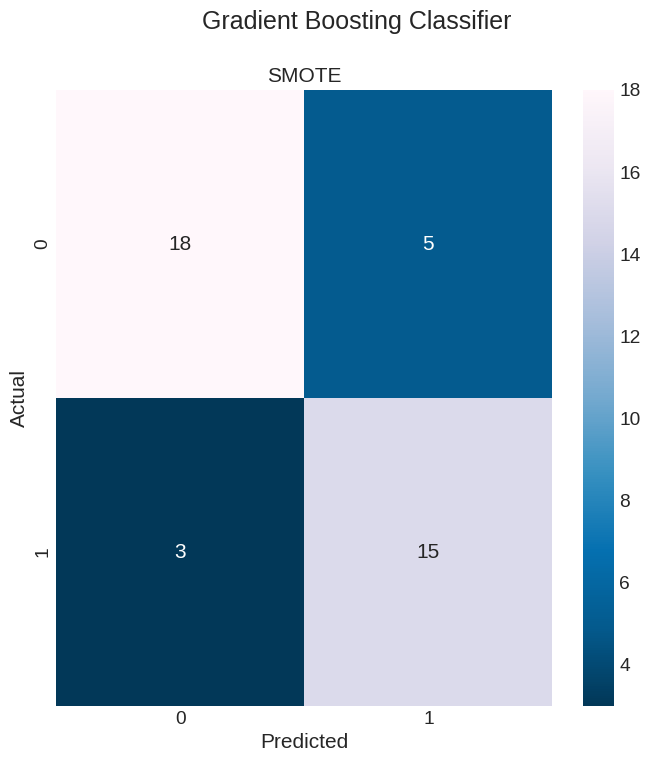

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))

fig.suptitle('Gradient Boosting Classifier')

sns.heatmap(cm_gbc_sm, annot=True, fmt="d", cmap='PuBu_r', ax=ax)
ax.set_title('SMOTE')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

plt.show()

Analisis Model Gradient Boosting Classifier dengan Oversampling :
- hasil evaluasi dari model Gradient Boosting Classifier didapat nilai
  - Accurasi Scor sebanyak 0.78
  - Precission sebanyak 0.73
  - Recall 0.77 dan
  - F1-Score sebanyak 0.75
- hasil dari Confusion Matrik didapat nilai
  - True Negatif sebanyak 17
  - False Positif sebanyak 6
  - False Negative sebanyak 3
  - True Positive sebanyak 15

## AdaBooster Classifier

## Melatih Model AdaBooster Classifier

In [ ]:
ada_clf_s = AdaBoostClassifier( )
ada_clf_s.fit(xs_train_scaled, ys_train)

AdaBoostClassifier()

## Evaluation Matrik dengan Oversampling

In [ ]:
y_pred_adaBoosts = ada_clf_s.predict(xs_test_scaled)
print(f'Accuracy Score AdaBoost Classifier : {metrics.accuracy_score(ys_test, y_pred_adaBoosts)}')
print(f'Precision AdaBoost Classifier      : {metrics.precision_score(ys_test, y_pred_adaBoosts)}')
print(f'Recall AdaBoost Classifier         : {metrics.recall_score(ys_test, y_pred_adaBoosts)}')
print(f'F1-Score AdaBoost Classifier       : {metrics.f1_score(ys_test, y_pred_adaBoosts)}')

Accuracy Score AdaBoost Classifier : 0.7560975609756098
Precision AdaBoost Classifier      : 0.6666666666666666
Recall AdaBoost Classifier         : 0.8888888888888888
F1-Score AdaBoost Classifier       : 0.761904761904762


## Confusion Matrik dengan Oversampling

In [ ]:
cm_adaboost_sm = confusion_matrix(ys_test, y_pred_adaBoosts)
cm_adaboost_sm

array([[15,  8],
       [ 2, 16]])

In [ ]:
y_pred_adaBoosts = ada_clf_s.predict(xs_test_scaled)
print(f"Train Data Score: {ada_clf_s.score(xs_train_scaled, ys_train)}")
print(f"Test Data Score: {ada_clf_s.score(xs_test_scaled, ys_test)}")
print("\nClassification Report:")
print(classification_report(ys_test, y_pred_adaBoosts))

Train Data Score: 0.8136986301369863
Test Data Score: 0.7560975609756098

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.65      0.75        23
           1       0.67      0.89      0.76        18

    accuracy                           0.76        41
   macro avg       0.77      0.77      0.76        41
weighted avg       0.79      0.76      0.76        41



## Analisis Resampling terhadap Score Recall pada model AdaBoost Classifier :
Sebelum dilakukan SMOTE, model memiliki recall yang rendah pada kelas minoritas sebesar 0.42 setelah dilakukan SMOTE, recall meningkat menjadi 0.78, menunjukkan bahwa model menjadi lebih mampu dalam mengklasifikasikan sampel pada kelas minoritas dengan benar. Hal ini disebabkan karena SMOTE melakukan oversampling pada sampel-sampel pada kelas minoritas sehingga membuat model memiliki lebih banyak data untuk dipelajari pada kelas minoritas.

## Menampilkan visualisasi confusion matrik model AdaBoost Classifier dengan Oversampling

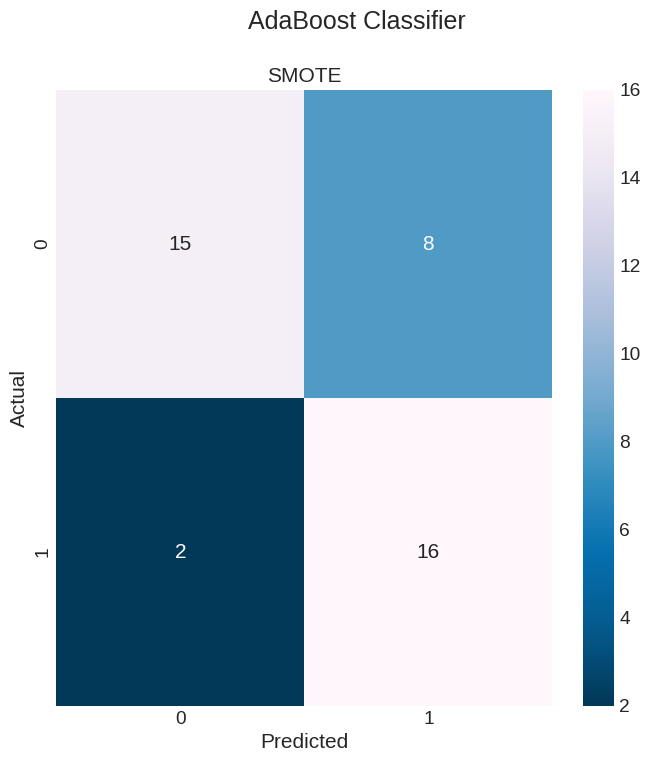

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))

fig.suptitle('AdaBoost Classifier')

sns.heatmap(cm_adaboost_sm, annot=True, fmt="d", cmap='PuBu_r', ax=ax)
ax.set_title('SMOTE')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

plt.show()

Analisis Model AdaBoost Classifier dengan Oversampling :
- hasil evaluasi dari model AdaBoost Classifier didapat nilai
  - Accurasi Scor sebanyak 0.76
  - Precission sebanyak 0.67
  - Recall 0.89 dan
  - F1-Score sebanyak 0.76
- hasil dari Confusion Matrik didapat nilai
  - True Negatif sebanyak 15
  - False Positif sebanyak 8
  - Fals-e Negative sebanyak 2
  - True Positive sebanyak 16

## Kurva ROC dengan Oversampling

Mengimplementasikan predict_proba() pada setiap model dengan oversampling yang digunakan untuk memprediksi probabilitas kelas target

In [ ]:
y_pred_rfs_proba = rnd_clf_s.predict_proba(xs_test_scaled)
y_pred_gbc_proba = grad_clf_s.predict_proba(xs_test_scaled)
y_pred_adaboost_proba = ada_clf_s.predict_proba(xs_test_scaled)

## Memvisualisasikan kurva ROC model dengan oversampling untuk membandingkan akurasinya

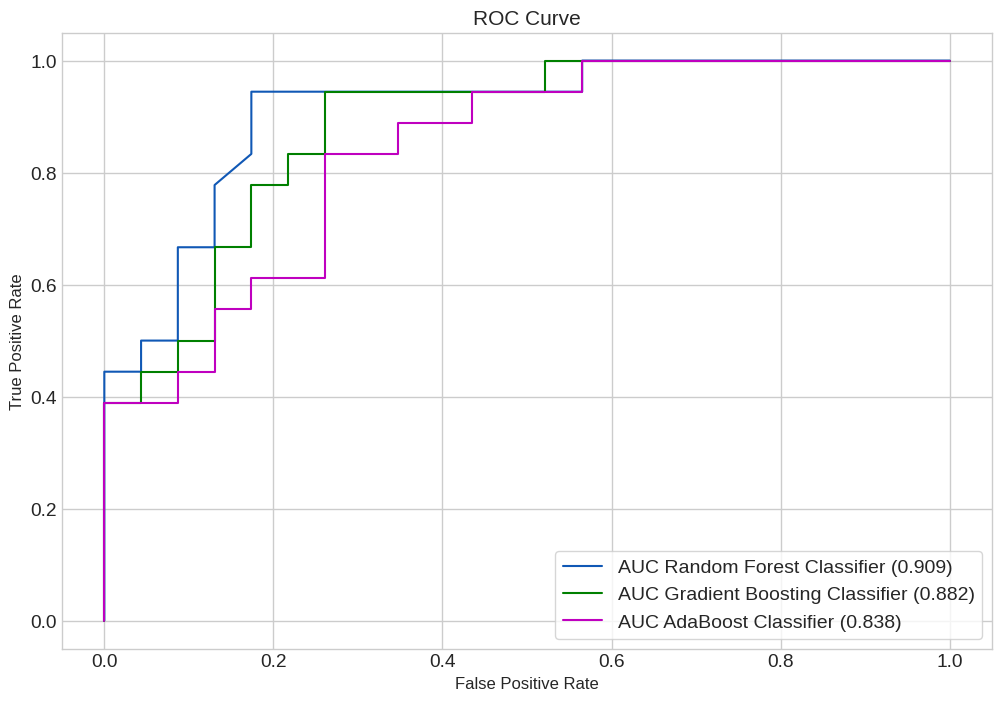

In [ ]:
fpr_rfs, tpr_rfs, threshold_rfs = roc_curve(ys_test, y_pred_rfs_proba[:,1])
auc_score_sm1 = auc(fpr_rfs, tpr_rfs)
fpr_gbc, tpr_gbc, threshold_gbc = roc_curve(ys_test, y_pred_gbc_proba[:,1])
auc_score_sm3 = auc(fpr_gbc, tpr_gbc)
fpr_adaboost, tpr_adaboost, threshold_adaboost = roc_curve(ys_test, y_pred_adaboost_proba[:,1])
auc_score_sm4 = auc(fpr_adaboost, tpr_adaboost)

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 8))
plt.plot(fpr_rfs, tpr_rfs, '-', color='#1058B5', label='AUC Random Forest Classifier (%0.3f)' % auc_score_sm1)
plt.plot(fpr_gbc, tpr_gbc, '-', color='g', label="AUC Gradient Boosting Classifier (%0.3f)" % auc_score_sm3)
plt.plot(fpr_adaboost, tpr_adaboost, '-', color='m', label="AUC AdaBoost Classifier (%0.3f)" % auc_score_sm4)

plt.legend(loc='lower right', prop={'size': 14}, frameon=True)
plt.title("ROC Curve", fontsize=15)
plt.ylabel("True Positive Rate", fontsize=12)
plt.xlabel("False Positive Rate", fontsize=12)
plt.show()

Analisi Kurva ROC dengan Oversampling :
Dari hasil kurva diatas terdapat 3 kurva, yaitu

- Kurva dengan warna biru / Random Forest dengan nilai Area Under Curve (AUC) sebesar 0.90
- Kurva warna hijau / Gradient Boosting dengan nilai Area Under Curve (AUC) sebesar 0.87
- Kurva warna ungu / adaBoost dengan nilai Area Under Curve (AUC) sebesar 0.83
Maka dapat disimpulkan bahwa kurva dengan warna biru atau random forest lebih bagus dibandingkan kinerja kurva warna hijau dan ungu

## Hyperparameter Tuning

Melakukan hyperparameter menggunakan RandomizedSearchCV
Pencarian acak atau random search merupakan metode mencari kombinasi secara acak dari hyperparameter terpilih dan menghasilkan kombinasi hyperparameter acak terbaik yang akan digunakan untuk melatih model.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [5, 10, 15, 20, 25, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                                   param_grid,
                                   n_iter=100,
                                   cv=5,
                                   random_state=42)
random_search.fit(xs_train_scaled, ys_train)

best_model = random_search.best_estimator_
best_model

RandomForestClassifier(bootstrap=False, criterion='entropy',
                       max_features='log2', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=300, random_state=42)

- Model random forest ini sebagai alternatif dari Decision Tree karena melakukan perhitungan Decision Tree sebanyak beberapa kali, dalam hal ini menetapkan 'n_estimators' = 150 dan 'max_depth' = 20, maka dilakukan perhitungan Decision Tree sebanyak 150 kali dengan kedalaman maksimum pohonnya berjumlah 20.
- Mempertimbangkan akar kuadrat dari jumlah total fitur untuk menentukan pemisahan terbaik dengan menetapkan 'max_features'= 'sqrt', 'log2'.
- Teknik resampling dilakukan dengan mengambil sampel data beserta pengembalian diatur sebagai 'bootstrap' = False.
- Jumlah sampel minimum untuk membagi internal node yaitu sebesar 5 dengan parameter 'min_sample_split' = 5, serta untuk sampel minimum yang diperlukan untuk berada di simpul daun yaitu sebesar 1 ditunjukkan dengan 'min_samples_leaf' = 1 dan 'random_state' = 42.
- hyperparameter terbaik berdasarkan pencarian acak akan digunakan untuk pelatihan model pertama Random Forest.

In [ ]:
random_model = RandomForestClassifier(bootstrap=False, criterion='entropy',
                       max_features='log2', min_samples_leaf=1,
                       min_samples_split=5, n_estimators=120, random_state=42)
random_model.fit(xs_train_scaled, ys_train)

RandomForestClassifier(bootstrap=False, criterion='entropy',
                       max_features='log2', min_samples_split=5,
                       n_estimators=120, random_state=42)

menampilkan nilai Accuracy Score, Precision, Recall, F1-Score dengan Hyperparameter

In [ ]:
y_pred_rf_tuned = random_model.predict(xs_test_scaled)
print(f'Accuracy Score Random Forest: {metrics.accuracy_score(ys_test, y_pred_rf_tuned)}')
print(f'Precision Random Forest     : {metrics.precision_score(ys_test, y_pred_rf_tuned)}')
print(f'Recall Random Forest        : {metrics.recall_score(ys_test, y_pred_rf_tuned)}')
print(f'F1-Score Random Forest      : {metrics.f1_score(ys_test, y_pred_rf_tuned)}')

Accuracy Score Random Forest: 0.8780487804878049
Precision Random Forest     : 0.8421052631578947
Recall Random Forest        : 0.8888888888888888
F1-Score Random Forest      : 0.8648648648648649


Menampilkan train data score, test data score, confusion matrix, dan classification report (laporan klasifikasi) untuk mengukur performa hasil pengujian model Random Forest Classifier dengan Hyperparameter

In [ ]:
cm_rfs_sm_tuned = confusion_matrix(ys_test, y_pred_rf_tuned)
cm_rfs_sm_tuned

array([[20,  3],
       [ 2, 16]])

In [ ]:
y_pred_rf_tuned = random_model.predict(xs_test_scaled)
print(f"Train Data Score: {random_model.score(xs_train_scaled, ys_train)}")
print(f"Test Data Score: {random_model.score(xs_test_scaled, ys_test)}")
print("\nClassification Report:")
print(classification_report(ys_test, y_pred_rf_tuned))

Train Data Score: 1.0
Test Data Score: 0.8780487804878049

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89        23
           1       0.84      0.89      0.86        18

    accuracy                           0.88        41
   macro avg       0.88      0.88      0.88        41
weighted avg       0.88      0.88      0.88        41



Menampilkan visualisasi confusion matrix model random forest Hyperparameter

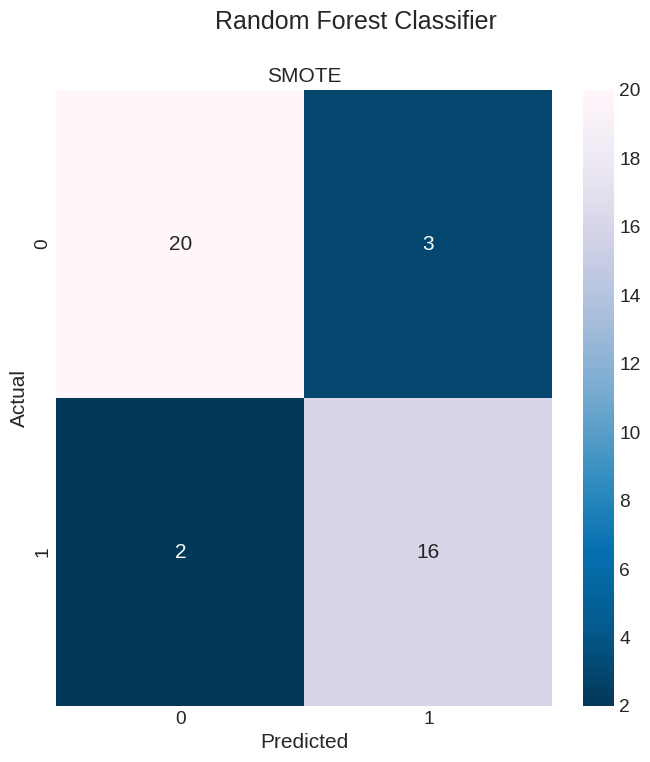

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
fig.suptitle('Random Forest Classifier')
sns.heatmap(cm_rfs_sm_tuned, annot=True, fmt="d", cmap='PuBu_r', ax=ax)
ax.set_title('SMOTE')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

##Analisis Model Random Forest dengan Hyperparameter :
hasil evaluasi dari model Random Forest dengan Hyperparameter didapat nilai akurasi sebesar 0.88, precision sebesar 0.88, recall sebesar 0.88, dan F1-score sebesar 0.88. Model ini mampu memprediksi dengan baik kedua kelas, dengan precision yang tinggi untuk kelas 0 (0.91) dan kelas 1 (0.84), serta recall yang seimbang untuk kedua kelas (0.87 untuk kelas 0 dan 0.89 untuk kelas 1). Dalam hal ini, model memiliki kinerja yang baik dalam mengklasifikasikan data pada kedua kelas dengan baik. Dari confusion matrix, dapat disimpulkan bahwa model ini memiliki 18 True Negative, 5 False Positive, 2 False Negative, dan 16 True Positive.



#Kesimpulan :
Dari hasil evaluasi model, terdapat lima model yang dievaluasi, yaitu Random Forest, Gradient Booster, AdaBoost, Random Forest dengan SMOTE (Oversampling), dan Gradient Boost dengan SMOTE (Oversampling). Semua model memiliki akurasi yang relatif tinggi, namun terdapat perbedaan dalam precision, recall, dan F1-score.

Model Random Forest, Gradient Booster, dan AdaBoost memiliki hasil evaluasi yang serupa dengan akurasi sebesar 0.67, precision sebesar 0.68, recall sebesar 0.83, dan F1-score sebesar 0.75. Model-model ini cenderung memberikan performa yang seimbang antara precision dan recall, dengan tingkat akurasi yang cukup baik.

Namun, model Random Forest dengan SMOTE (Oversampling) dan Gradient Boost dengan SMOTE (Oversampling) memberikan hasil evaluasi yang lebih baik dibandingkan ketiga model sebelumnya. Model Random Forest dengan SMOTE (Oversampling) memiliki akurasi sebesar 0.80, precision sebesar 0.86, recall sebesar 0.78, dan F1-score sebesar 0.82. Sementara itu, model Gradient Boost dengan SMOTE (Oversampling) memiliki akurasi sebesar 0.78, precision sebesar 0.85, recall sebesar 0.74, dan F1-score sebesar 0.79. Kedua model ini memberikan peningkatan yang signifikan dalam memprediksi kelas minoritas (kelas 1) dengan recall yang lebih baik. Oleh karena itu, dari hasil evaluasi tersebut, dapat disimpulkan bahwa model Random Forest dengan SMOTE (Oversampling) dan Gradient Boost dengan SMOTE (Oversampling) merupakan model yang paling baik dalam memprediksi kelas-kelas pada dataset ini.